In [23]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd


In [24]:
test = pd.read_csv("recall_dataset.csv")
test2 = test.loc[(test['Model Year'] >= 2008) & (test['Model Year'] < 9999)& (test['Recall Type'] == 'VEHICLE')  ]
test2.head()
count = test2['Vehicle Make'].value_counts()
total = count.sum()
ford_count = count[0]
peterbilt_count = count[1]
freightliner_count = count[2]
toyota_count = count[3]
chevrolet_count = count[4]

perc_ford = round((ford_count/total) * 100,2)
perc_peterbilt = round((peterbilt_count/total) * 100,2)
perc_freightliner = round((freightliner_count/total) * 100,2)
perc_toyota = round((toyota_count/total) * 100,2)
perc_chevrolet = round((chevrolet_count/total) * 100,2)

veh_make_allyear = pd.DataFrame({"Makes":["Ford","Peterbilt","Freightliner","Toyota","Chevrolet"],"Total Count":[ford_count,peterbilt_count,freightliner_count,toyota_count,chevrolet_count],"Percentage":[perc_ford,perc_peterbilt,perc_freightliner,perc_toyota,perc_chevrolet]})

veh_make_allyear["Percentage"] = veh_make_allyear["Percentage"].map("{:.2f}%".format)

veh_make_allyear





,Makes,Total Count,Percentage
0,Ford,1089,3.12%
1,Peterbilt,1071,3.07%
2,Freightliner,913,2.61%
3,Toyota,817,2.34%
4,Chevrolet,723,2.07%


In [25]:

# Car Recalls
car_manufacturers = pd.DataFrame(veh_make_allyear.groupby(["Makes"]).sum()).reset_index()

car_recalls_df = car_manufacturers[["Makes", "Total Count"]]
car_recalls_df = car_recalls_df.set_index("Makes")


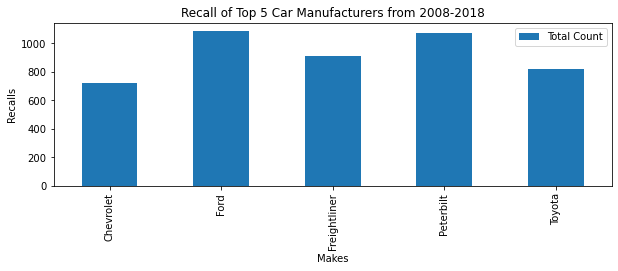

In [28]:
#Bar plot showing the total number of recalls per car manufacturer
car_recalls_df.plot(kind="bar", figsize=(10,3))

plt.title("Recall of Top 5 Car Manufacturers from 2008-2018")
plt.xlabel("Makes")
plt.ylabel("Recalls")

plt.savefig('RecallofTop5CarManufacturersfrom2008-2018')
plt.show()

#add timeframe. recall of top 5 manufacturers
